In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import lane_detection
import lane_following

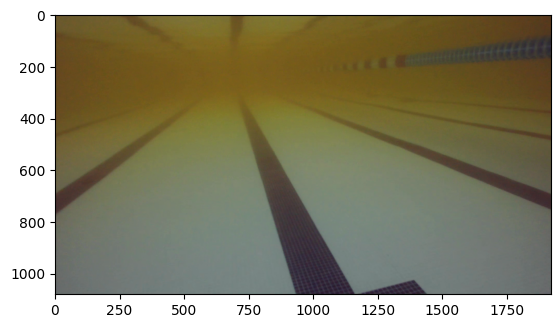

In [12]:
# img = cv2.imread("lanes.png")
img = cv2.imread("rov_pool.jpg")
width = img.shape[1]
plt.imshow(img)

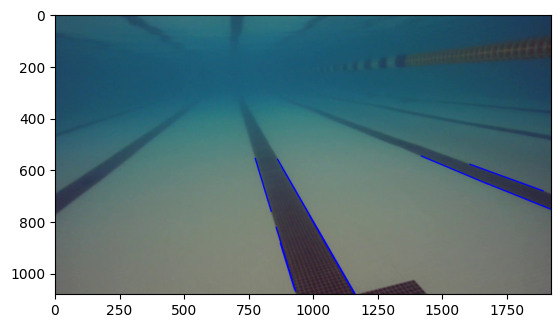

In [13]:
lines = lane_detection.detect_lines(img, 50, 90, 3, 150, 10)
test_img = lane_detection.draw_lines(img, lines, (255, 0, 0))
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

In [14]:
# fixed_lines = lane_detection.merge_colinear_lines(lines)
(slopes, intercept_points) = lane_detection.get_slopes_intercepts(lines)
x_intercepts = [point[0] for point in intercept_points]

x_intercepts

[1160.0, 931.0, 2983.0, 1158.0, 2731.0, 2680.0, 931.0, 932.0, 1157.0]

In [15]:
# filtered_lines = lane_detection.merge_colinear_lines(lines)
filtered_lines = lines
lanes = lane_detection.detect_lanes(filtered_lines, width)

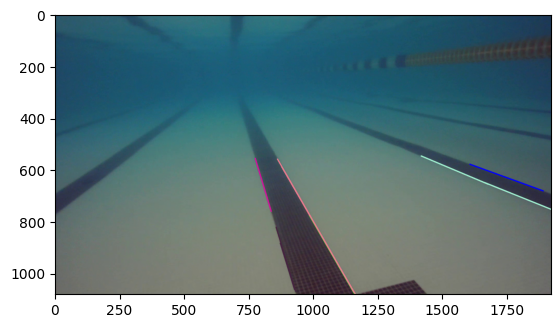

In [16]:
# lined_img = lane_detection.draw_lines(img, lines)
laned_img = lane_detection.draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
(center_slope, center_intercept) = lane_following.get_lane_center(lanes)
direction = lane_following.recommend_direction(center_intercept, center_slope, width)
print(f"The AUV should go to the {direction}")

Center x_intercept: 1159.0
turn left
The AUV should go to the forward


Center x_intercept: 2050.0
turn left
The AUV should go to the right
[785, 734, 958, 1073]
[781, 722, 963, 1079]
[1231, 733, 1636, 905]
[1270, 749, 1806, 976]
[1270, 749, 1806, 976]
[1309, 764, 1918, 1022]
[1309, 764, 1918, 1022]
[1439, 782, 1919, 957]
[1439, 782, 1919, 957]
[1416, 773, 1780, 905]


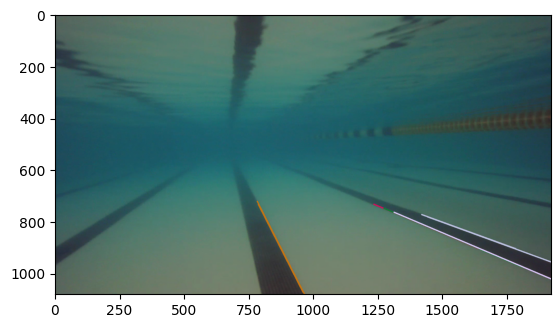

Center x_intercept: 1055.0
turn left
The AUV should go to the forward
[770, 565, 833, 1075]
[779, 630, 834, 1079]
[779, 630, 834, 1079]
[798, 764, 835, 1069]
[877, 665, 1052, 1079]
[869, 644, 1044, 1058]
[869, 644, 1044, 1058]
[815, 515, 1040, 1046]
[815, 515, 1040, 1046]
[816, 516, 991, 928]
[1533, 657, 1906, 808]
[1567, 672, 1870, 794]
[1567, 672, 1870, 794]
[1327, 573, 1919, 812]


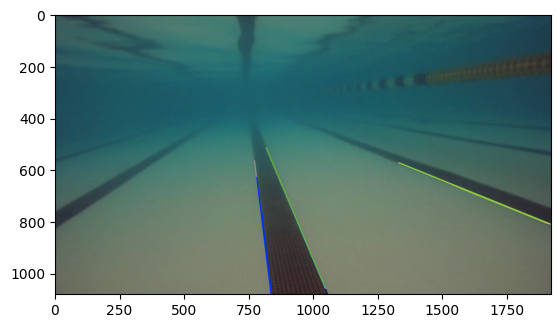

Center x_intercept: 845.0
turn left
The AUV should go to the forward
[661, 1079, 816, 501]
[666, 1066, 827, 467]
[666, 1066, 827, 467]
[705, 927, 828, 466]
[705, 927, 828, 466]
[890, 440, 1024, 1072]
[837, 1067, 848, 745]
[843, 1079, 854, 761]
[890, 440, 1024, 1072]
[895, 458, 1027, 1079]
[895, 458, 1027, 1079]
[946, 690, 1027, 1072]


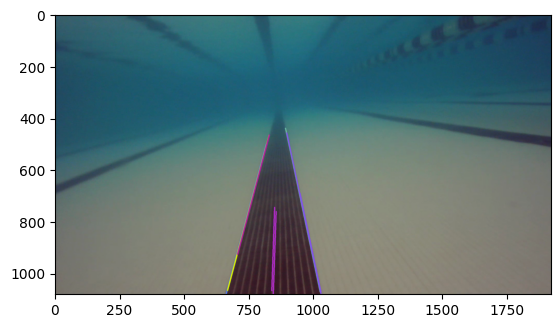

Center x_intercept: 6235.5
turn left
The AUV should go to the right
[261, 1078, 546, 639]
[261, 1079, 549, 636]
[261, 1079, 549, 636]
[267, 1073, 472, 757]
[589, 1077, 630, 617]
[591, 1075, 629, 638]
[591, 1075, 629, 638]
[591, 1079, 624, 702]
[1489, 583, 1909, 627]
[1080, 539, 1919, 627]
[1080, 539, 1919, 627]
[1511, 585, 1915, 627]
[1511, 585, 1915, 627]
[1450, 546, 1909, 578]
[1450, 546, 1909, 578]
[1059, 519, 1835, 573]


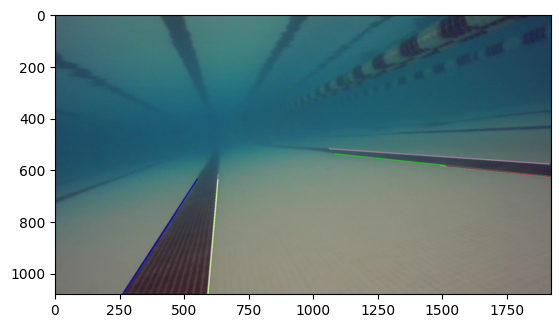

KeyboardInterrupt: 

In [18]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

# plt.imshow(detect_lanes(cv2.imread("rov_pool.jpg"), 50, 50))
# ret, frame = cap.read()
# plt.imshow(detect_lanes(frame, 50, 50))

count = 0
frequency = 60
while cap.isOpened():
    ret, frame = cap.read()
    if count % frequency == 0:
        width = frame.shape[1]
        height  = frame.shape[0]

        lines = lane_detection.detect_lines(frame, 50, 50, 3, 300, 30)
        # sorted_lines = lane_detection.merge_colinear_lines(lines)

        lanes = lane_detection.detect_lanes(lines, width)
        laned_img = lane_detection.draw_lanes(frame, lanes)

        (center_slope, center_intercept) = lane_following.get_lane_center(lanes)

        direction = lane_following.recommend_direction(center_intercept, center_slope, width)
        print(f"The AUV should go to the {direction}")
        for lane in lanes:
            for line in lane:
                print(line.get_points())
                
        plt.imshow(cv2.cvtColor(laned_img, cv2.COLOR_BGR2RGB))
        plt.show()
        

    count += 1